In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import datetime

from matplotlib import pyplot as plt

# Preprocessing Pre and Post EIP-1559

In [2]:
df_blocks_post = pd.read_csv('blocks_post.csv')

In [3]:
df_blocks_pre = pd.read_csv('reg_pre_eip_data.csv')

### Post EIP-1559 Data

In [4]:
df_blocks_post = df_blocks_post.sort_values('number')

In [5]:
df_blocks_post

,number,hash,parent_hash,nonce,sha3_uncles,logs_bloom,transactions_root,state_root,receipts_root,miner,difficulty,total_difficulty,size,extra_data,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
4,12965000,0x9b83c12c69edb74f6c8dd5d052765c1adf940e320bd1...,0x3de6bb3849a138e6ab0b83a3a00dc7433f1e83f7fd48...,0xb223da049adf2216,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x24e74ad77d9a2b27bdb8f6d6f7f1cffdd8cfb47fdebd...,0xdfcb68d3a3c41096f4a77569db7956e0a0e750fad185...,0x41cf6e8e60fd087d2b00360dc29e5bfb21959bce1f4c...,0x8a8865cd785e2e9dfce7da83aca010b10b9af2abbd36...,0x7777788200b672a42421017f65ede4fc759564c8,7742494561645080,28494409340649014490153,137049,0x68747470733a2f2f7777772e6b7279707465782e6f7267,30029122,30025257,1628166822,259,1000000000
6,12965001,0xa32d159805750cbe428b799a49b85dcb2300f61d8067...,0x9b83c12c69edb74f6c8dd5d052765c1adf940e320bd1...,0x0956e895d988798e,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x74adf8cfdd0a1ddf12f3d6d5bbd79cab73a19b6986fc...,0x03c97f958cc4db3cc60def5ce1e83aaf1490837f5f57...,0x0180d59eb0855ef6dbca806fbe81491bea252ab2e0d3...,0x2335850563dbf51f65a37508f2fdd9da1780f70cfa46...,0x829bd824b016326a401d083b33d092293333a830,7742495635386904,28494417083144649877057,158678,0xe4b883e5bda9e7a59ee4bb99e9b1bc030521,29999798,29985144,1628166835,257,1124967822
8,12965002,0xfcb92039b16c0075d4c6c57cb55ba8c661914325bb76...,0xa32d159805750cbe428b799a49b85dcb2300f61d8067...,0x53b623b975c42d06,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x67bd1d7f3c5a2b5d15bcb4ef8b95feafbfdadad8fcec...,0x2d062a3463427b8297819abc1a344fc72412aba542f6...,0x4417fa3fa0483322e9b19d2a2659c8e0a7e7fd2cb68d...,0xe9444c1d62f922849f2e00fb71cf1aeea2c3410c017f...,0x01ca8a0ba4a80d12a8fb6e3655688f57b16608cf,7738716193681762,28494424821860843558819,96685,0x706f6f6c2e62696e616e63652e636f6d,29970503,29950343,1628166854,321,1265451421
14,12965003,0x6fc26021db56beee14e3d3e303344ecfbc5d84f7147e...,0xfcb92039b16c0075d4c6c57cb55ba8c661914325bb76...,0x0cfc576bf3f9fecf,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0xd1b9d8f2e52039ff38cf2019a73fb5a5489ad00c4f63...,0x4b021915bde15eb80ee59d7d8eacc77d8ea8d4e519c2...,0x38fcc7de63814f9d792b85a264728c8bdb1216df8e3f...,0x668a8eb055326ef08d75bd21a5eb971705fd8bc53c1f...,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,7742495937440032,28494432564356780998851,86936,0xd883010a06846765746888676f312e31362e36856c69...,29941236,29933895,1628166857,265,1423420054
15,12965004,0xf615c1d20904f1be47dff7068b625a91f52d02691b38...,0x6fc26021db56beee14e3d3e303344ecfbc5d84f7147e...,0x0a1b8a8269c0b7a0,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x6ebd70ceb9dc7a7fd9d6badadfbbf1b5b10e0b27bec1...,0x2313a01ce3db52819c79b040e303aee510e1307e9995...,0x796c30e13732484b3d96bb79f4aae9192191d9896ad7...,0x4d6f34d8907a9b802a7565f46078c264e81499233591...,0x829bd824b016326a401d083b33d092293333a830,7742497011181856,28494440306853792180707,89206,0xe4b883e5bda9e7a59ee4bb99e9b1bc030621,29911998,29895283,1628166868,280,1601260312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328688,13293688,0x4c459bfc1a4915153fdd4a486623bfa3829c958c9ec7...,0xb475e3ef384b3633a5b6a1e3e6b10ff6de88b40459fb...,0x97966b23d046675f,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x57a5624b7c0a60f5b1e93646e79917f780f2f334aab7...,0x9ed7eac4c22295c68fdfea1dd0d3b11224904124e1cc...,0xb72909ada7320718b4fc6b57c12057231095a6f80feb...,0x32abf9acd295a90d28e4e96b9c9a85fa70d0ac1dc70e...,0x99c85bb64564d9ef9a99621301f22c9993cb89e3,9118740120439526,31247354326833924782370,76965,0x626565706f6f6c2e6f72675f363009,30029295,21183631,1632556128,216,33868610851
328689,13293689,0x1845ac9cfc1699e776a8d380a562a9504de1c238cb1f...,0x4c459bfc1a4915153fdd4a486623bfa3829c958c9ec7...,0xdc37b6bd8f4cc41c,0x1dcc4de8dec75d7aab85b567b6ccd41ad312451b948a...,0x47309b4e20a3848595e72691a7389a22100a10600000...,0x0dce51843d78c10791d41796a57f336e57cae855af78...,0xc995ca69ad8f43c2ca067a9a98f8364084878bb3c4a7...,0x91f41cd314ce8634ce138417b99833fe8

In [6]:
df_blocks_post.drop(df_blocks_post.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13]], axis = 1, inplace = True)

In [7]:
df_blocks_post.rename(columns={'number': 'block_number'}, inplace=True)

In [8]:
df_blocks_post

,block_number,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
4,12965000,30029122,30025257,1628166822,259,1000000000
6,12965001,29999798,29985144,1628166835,257,1124967822
8,12965002,29970503,29950343,1628166854,321,1265451421
14,12965003,29941236,29933895,1628166857,265,1423420054
15,12965004,29911998,29895283,1628166868,280,1601260312
...,...,...,...,...,...,...
328688,13293688,30029295,21183631,1632556128,216,33868610851
328689,13293689,30000000,29998089,1632556140,1136,35608036680
328690,13293690,30000000,29988724,1632556166,1410,40058474207
328691,13293691,30000000,29978866,1632556174,743,45062019321


In [9]:
df_blocks_post.set_index("block_number", inplace=True)

Plot histogram of gas used.

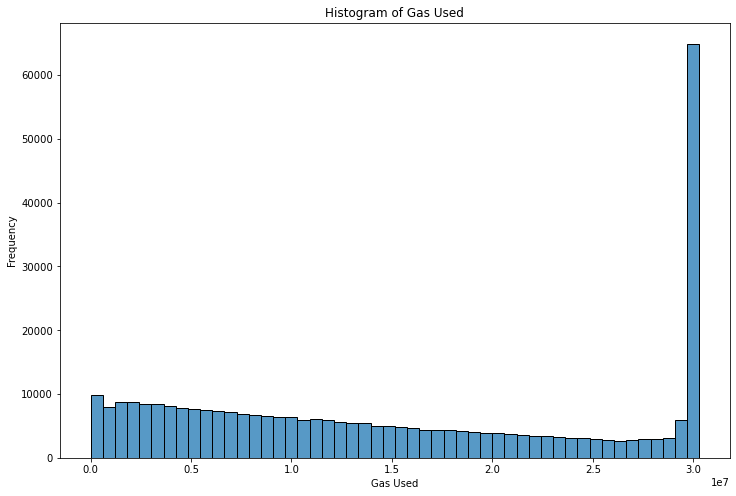

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(df_blocks_post.gas_used, bins=50)

plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.title('Histogram of Gas Used')

plt.show;

Scroll down to see a comparision of the histogram of gas used in each block before and after EIP-1559. It continues to align with Mojtaba Tefagh points in his hackmd post (https://hackmd.io/@PIncentivus/EIP-3416). Here we'll use a larger number of post EIP-1559 block data.

Plot histogram of transaction count.

Text(0.5, 1.0, 'Histogram of transaction count')

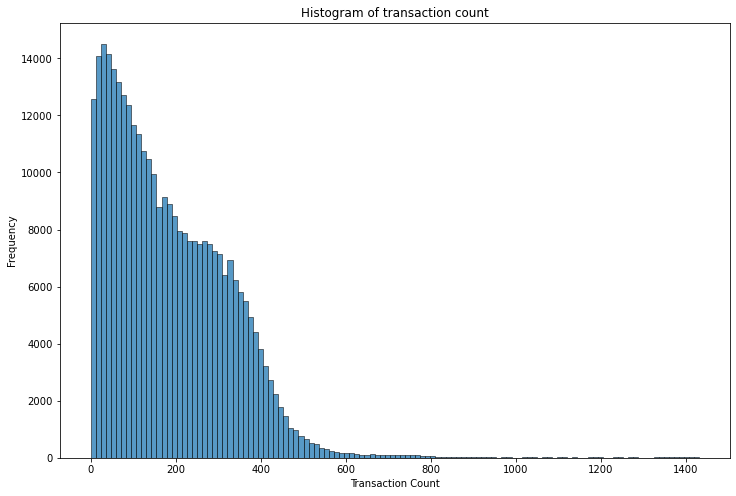

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(df_blocks_post.transaction_count, bins=120)

plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.title('Histogram of transaction count')

Pick out empty blocks and assign to a new dataframe.

In [12]:
df_empty_blocks_post = df_blocks_post[df_blocks_post['gas_used'].between(0, 0)]

In [13]:
df_empty_blocks_post

,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas
block_number,,,,,
12965025,29707933,0,1628167151,0,18966352132
12965030,29620959,0,1628167234,0,26574645197
12965102,29160751,0,1628168330,0,44897818302
12965108,28990313,0,1628168376,0,37721496602
12965111,29018594,0,1628168398,0,36312927336
...,...,...,...,...,...
13293321,30000000,0,1632551441,0,34067564225
13293580,30000000,0,1632554889,0,40351528462
13293671,30000000,0,1632555928,0,38747803668


Plot empty blocks via its gas used.

Text(0.5, 1.0, 'Visualize (Post EIP-1559) Empty Blocks via its Gas Used')

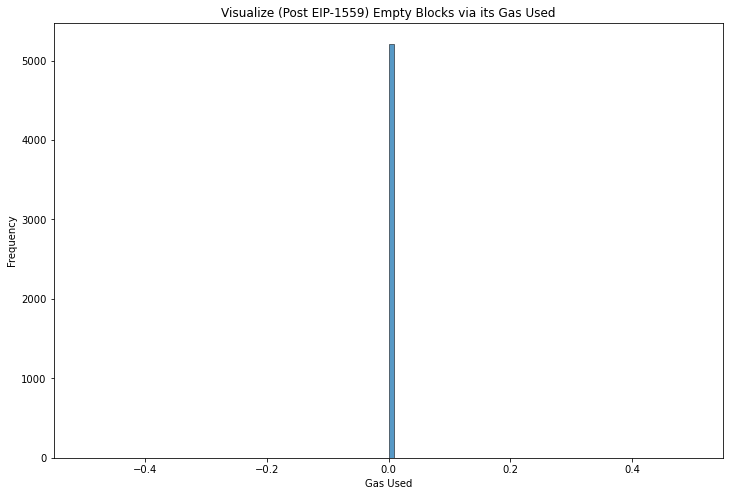

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(df_empty_blocks_post.gas_used, bins=120)

plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.title('Visualize (Post EIP-1559) Empty Blocks via its Gas Used')

In [15]:
len(df_empty_blocks_post.gas_used)

5214

We see that there are approximately 5000 empty blocks within block 12965000 to 13293692 (total of 328,693 blocks, from Aug-05-2021 to Sep-25-2021). We'll later see that with pre EIP-1559 data, chosen from a period of Feb-07-2021 to Mar-18-2021, have a similar number of empty blocks, which is around 5000.

In [16]:
df_empty_blocks_post['timestamp'] = pd.to_datetime(df_empty_blocks_post['timestamp'],unit='s')

<ipython-input-16-33fa7ecbc3c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_blocks_post['timestamp'] = pd.to_datetime(df_empty_blocks_post['timestamp'],unit='s')


In [17]:
df_empty_blocks_post['time'] = df_empty_blocks_post['timestamp'].dt.time

<ipython-input-17-05077ac136cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_blocks_post['time'] = df_empty_blocks_post['timestamp'].dt.time


In [18]:
df_empty_blocks_post

,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,time
block_number,,,,,,
12965025,29707933,0,2021-08-05 12:39:11,0,18966352132,12:39:11
12965030,29620959,0,2021-08-05 12:40:34,0,26574645197,12:40:34
12965102,29160751,0,2021-08-05 12:58:50,0,44897818302,12:58:50
12965108,28990313,0,2021-08-05 12:59:36,0,37721496602,12:59:36
12965111,29018594,0,2021-08-05 12:59:58,0,36312927336,12:59:58
...,...,...,...,...,...,...
13293321,30000000,0,2021-09-25 06:30:41,0,34067564225,06:30:41
13293580,30000000,0,2021-09-25 07:28:09,0,40351528462,07:28:09
13293671,30000000,0,2021-09-25 07:45:28,0,38747803668,07:45:28


In [19]:
# Pick out the hours within time.
def func(x):
    string = x[0:2]
    return string

In [20]:
df_empty_blocks_post.time = df_empty_blocks_post.time.astype(str).copy()

C:\Users\TienTran\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
df_empty_blocks_post.time

block_number
12965025    12:39:11
12965030    12:40:34
12965102    12:58:50
12965108    12:59:36
12965111    12:59:58
              ...   
13293321    06:30:41
13293580    07:28:09
13293671    07:45:28
13293681    07:47:17
13293692    07:49:56
Name: time, Length: 5214, dtype: object

In [22]:
df_empty_blocks_post["time_hours"] = df_empty_blocks_post.time.apply(func)

<ipython-input-22-754adb80a02b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_blocks_post["time_hours"] = df_empty_blocks_post.time.apply(func)


In [23]:
df_empty_blocks_post

,gas_limit,gas_used,timestamp,transaction_count,base_fee_per_gas,time,time_hours
block_number,,,,,,,
12965025,29707933,0,2021-08-05 12:39:11,0,18966352132,12:39:11,12
12965030,29620959,0,2021-08-05 12:40:34,0,26574645197,12:40:34,12
12965102,29160751,0,2021-08-05 12:58:50,0,44897818302,12:58:50,12
12965108,28990313,0,2021-08-05 12:59:36,0,37721496602,12:59:36,12
12965111,29018594,0,2021-08-05 12:59:58,0,36312927336,12:59:58,12
...,...,...,...,...,...,...,...
13293321,30000000,0,2021-09-25 06:30:41,0,34067564225,06:30:41,06
13293580,30000000,0,2021-09-25 07:28:09,0,40351528462,07:28:09,07
13293671,30000000,0,2021-09-25 07:45:28,0,38747803668,07:45:28,07


In [24]:
df_empty_blocks_post.time_hours = df_empty_blocks_post.time_hours.astype(int)

C:\Users\TienTran\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
df_empty_blocks_post.time_hours

block_number
12965025    12
12965030    12
12965102    12
12965108    12
12965111    12
            ..
13293321     6
13293580     7
13293671     7
13293681     7
13293692     7
Name: time_hours, Length: 5214, dtype: int32

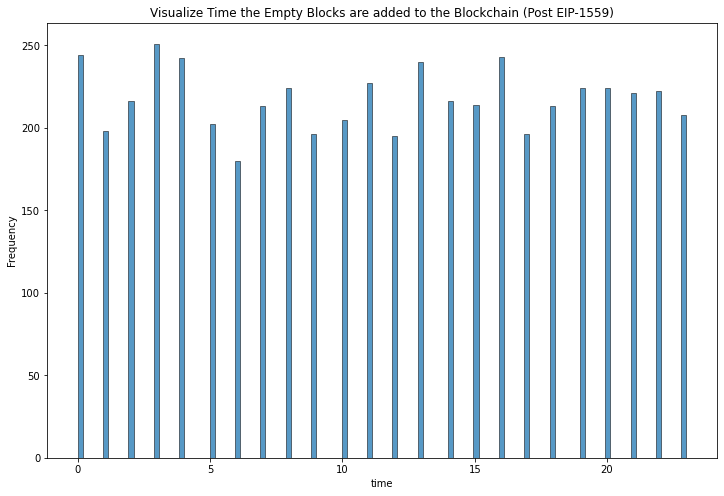

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(df_empty_blocks_post.time_hours, bins=120)

plt.xlabel('time')
plt.ylabel('Frequency')
plt.title('Visualize Time the Empty Blocks are added to the Blockchain (Post EIP-1559)')

plt.show;

•	For 328,693 blocks there are 5,214 blocks are empty block.
•	Empty blocks are added to the blockchain the least is at 6 AM to 7 AM.
•	Empty blocks are added to the blockchain the most is at 3 AM to 4 AM.

### Pre EIP-1559 Data

In [27]:
df_blocks_pre

,number,size,gas_limit,gas_used,timestamp,base_fee_per_gas
0,11811333,44643,12512206,12459259,1612727855,NaN
1,11811334,51820,12499989,12498672,1612727870,NaN
2,11811335,53694,12487783,12474603,1612727890,NaN
3,11811336,48038,12499977,12485111,1612727918,NaN
4,11811337,48303,12487771,12480655,1612727927,NaN
...,...,...,...,...,...,...
249996,12061328,58208,12500000,12483795,1616053279,NaN
249997,12061329,47286,12487794,12469637,1616053312,NaN
249998,12061330,54114,12475600,12466343,1616053315,NaN
249999,12061331,40737,12463418,12451780,1616053338,NaN


Plot histogram of gas used (Pre EIP-1559)

Text(0.5, 1.0, 'Histogram of Gas Used (Pre EIP-1559)')

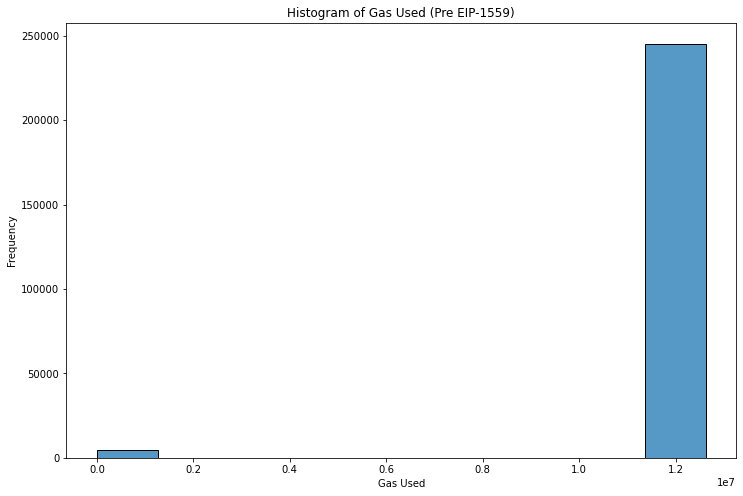

In [28]:
plt.figure(figsize=(12,8))
sns.histplot(df_blocks_pre.gas_used, bins=10)

plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.title('Histogram of Gas Used (Pre EIP-1559)')

In [29]:
df_blocks_pre.rename(columns={'number': 'block_number'}, inplace=True)

In [30]:
df_blocks_pre = df_blocks_pre.sort_values('block_number')

In [31]:
df_blocks_pre.set_index("block_number", inplace=True)

Pick out empty blocks and assign to a new dataframe.

In [32]:
df_empty_blocks_pre = df_blocks_pre[df_blocks_pre['gas_used'].between(0, 0)]

In [33]:
df_empty_blocks_pre

,size,gas_limit,gas_used,timestamp,base_fee_per_gas
block_number,,,,,
11811369,534,12499897,0,1612728325,NaN
11811375,541,12475476,0,1612728362,NaN
11811485,533,12500000,0,1612729862,NaN
11811514,544,12487782,0,1612730166,NaN
11811551,541,12475600,0,1612730669,NaN
...,...,...,...,...,...
12061099,541,12500000,0,1616049841,NaN
12061159,534,12487782,0,1616050473,NaN
12061208,540,12469457,0,1616051424,NaN


Text(0.5, 1.0, 'Visualize (Pre EIP-1559) Empty Blocks via its Gas Used')

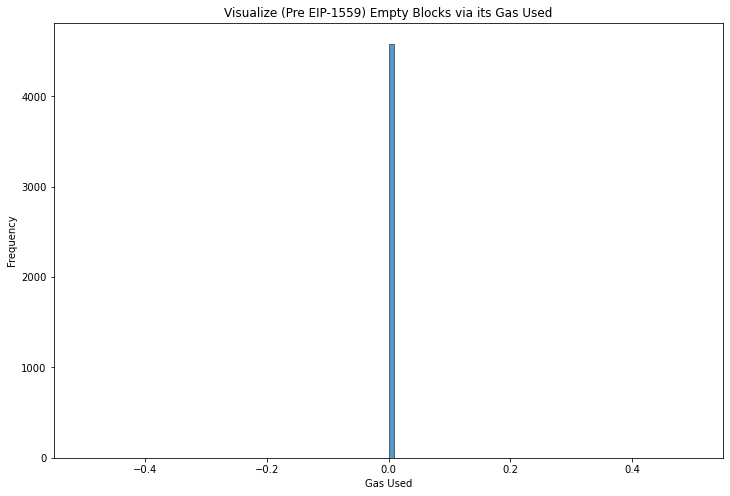

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df_empty_blocks_pre.gas_used, bins=120)

plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.title('Visualize (Pre EIP-1559) Empty Blocks via its Gas Used')

In [35]:
len(df_empty_blocks_pre.gas_used)

4585

We see that there are approximately 5000 empty blocks within block 11811333 to 12061332 (total of 250,000 blocks, from Feb-07-2021 to Mar-18-2021).

A comparison between Post EIP-1559 data and Pre EIP-1559 data, both ~1 month data, Aug – Sep and Feb – Mar, respectively, we see that they have a very similar number of empty blocks, around 5,000.

In [36]:
df_empty_blocks_pre['timestamp'] = pd.to_datetime(df_empty_blocks_pre['timestamp'],unit='s')

<ipython-input-36-d3ee41dea509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_blocks_pre['timestamp'] = pd.to_datetime(df_empty_blocks_pre['timestamp'],unit='s')


In [37]:
df_empty_blocks_pre['time'] = df_empty_blocks_pre['timestamp'].dt.time

<ipython-input-37-3909c8a44496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_blocks_pre['time'] = df_empty_blocks_pre['timestamp'].dt.time


In [38]:
df_empty_blocks_pre.time = df_empty_blocks_pre.time.astype(str).copy()

C:\Users\TienTran\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
df_empty_blocks_pre

,size,gas_limit,gas_used,timestamp,base_fee_per_gas,time
block_number,,,,,,
11811369,534,12499897,0,2021-02-07 20:05:25,NaN,20:05:25
11811375,541,12475476,0,2021-02-07 20:06:02,NaN,20:06:02
11811485,533,12500000,0,2021-02-07 20:31:02,NaN,20:31:02
11811514,544,12487782,0,2021-02-07 20:36:06,NaN,20:36:06
11811551,541,12475600,0,2021-02-07 20:44:29,NaN,20:44:29
...,...,...,...,...,...,...
12061099,541,12500000,0,2021-03-18 06:44:01,NaN,06:44:01
12061159,534,12487782,0,2021-03-18 06:54:33,NaN,06:54:33
12061208,540,12469457,0,2021-03-18 07:10:24,NaN,07:10:24


In [40]:
df_empty_blocks_pre["time_hours"] = df_empty_blocks_pre.time.apply(func)

<ipython-input-40-eb3a439e11cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empty_blocks_pre["time_hours"] = df_empty_blocks_pre.time.apply(func)


In [41]:
df_empty_blocks_pre.time_hours = df_empty_blocks_pre.time_hours.astype(int)

C:\Users\TienTran\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
df_empty_blocks_pre

,size,gas_limit,gas_used,timestamp,base_fee_per_gas,time,time_hours
block_number,,,,,,,
11811369,534,12499897,0,2021-02-07 20:05:25,NaN,20:05:25,20
11811375,541,12475476,0,2021-02-07 20:06:02,NaN,20:06:02,20
11811485,533,12500000,0,2021-02-07 20:31:02,NaN,20:31:02,20
11811514,544,12487782,0,2021-02-07 20:36:06,NaN,20:36:06,20
11811551,541,12475600,0,2021-02-07 20:44:29,NaN,20:44:29,20
...,...,...,...,...,...,...,...
12061099,541,12500000,0,2021-03-18 06:44:01,NaN,06:44:01,6
12061159,534,12487782,0,2021-03-18 06:54:33,NaN,06:54:33,6
12061208,540,12469457,0,2021-03-18 07:10:24,NaN,07:10:24,7


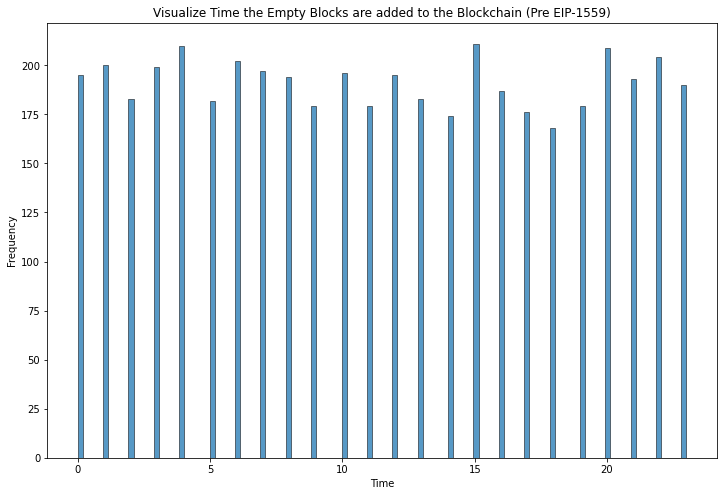

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(df_empty_blocks_pre.time_hours, bins=120)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Visualize Time the Empty Blocks are added to the Blockchain (Pre EIP-1559)')

plt.show;

• Empty blocks are added to the blockchain the least is at 6 PM to 7 PM.
• Empty blocks are added to the blockchain the most is at 3 PM to 4 PM.

#### The time the empty blocks are added to the blockchain the least and the most (6PM-7PM and 3PM-4PM) for this particular Pre EIP-1559 data literally the opposite of the chosen Post EIP-1559 data (6AM-7AM and 3AM-4AM).

Before we go to the simulation of "empty-due-to-demand" empty blocks. Let's us plot the histogram of gas used in each block before and after EIP-1559 all together here.

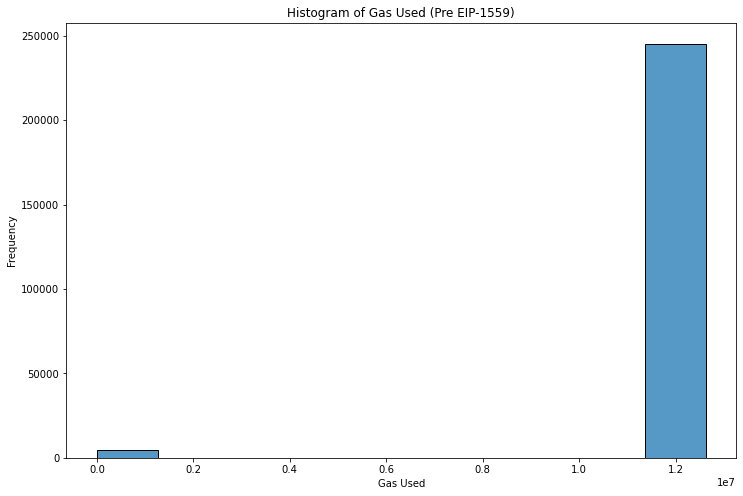

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(df_blocks_pre.gas_used, bins=10)

plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.title('Histogram of Gas Used (Pre EIP-1559)')

plt.show;

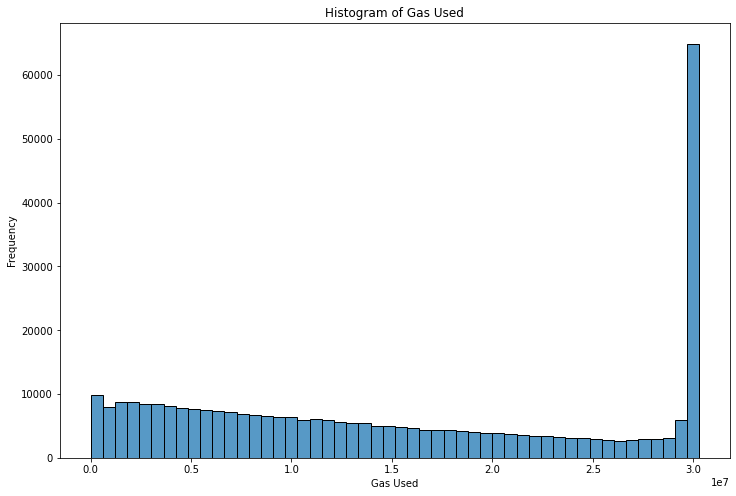

In [45]:
plt.figure(figsize=(12,8))
sns.histplot(df_blocks_post.gas_used, bins=50)

plt.xlabel('Gas Used')
plt.ylabel('Frequency')
plt.title('Histogram of Gas Used')

plt.show;

With a larger post EIP-1559 data, this still align with the statement from Mojtaba's hackmd post (https://hackmd.io/@PIncentivus/EIP-3416):

"the target which is the full block size is achieved most of the time pre-fork. However as a result of the predicted oscillations, we observe a bimodal density post-fork where the target which is the half block size is rarely achieved."

Since we are visit Mojtaba's hackmd post, we verify that the following statement by Mojtaba still holds:

"for a large enough sequence of blocks, we would expect that difference between the sum of gas used and the sum of the gas target is going to grow."

In [46]:
new_df = df_blocks_post.cumsum()

In [47]:
new_df.drop(new_df.columns[[2,3,4]], axis = 1, inplace = True)

In [48]:
new_df['target_gas'] = new_df.gas_limit/2

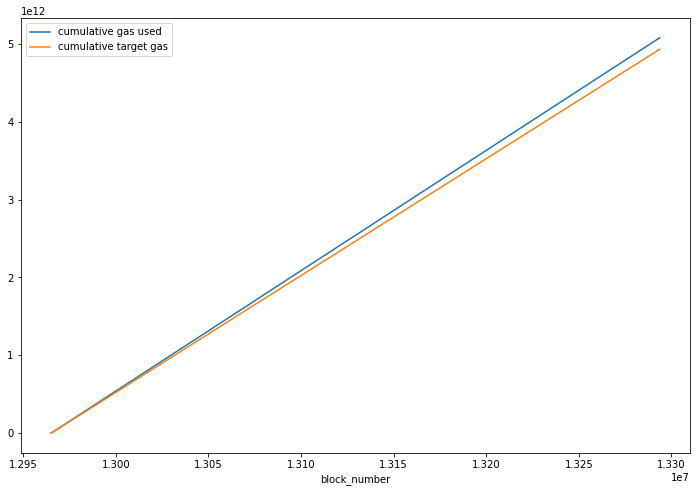

In [49]:
plt.figure(figsize=(12,8))

new_df.gas_used.plot(label='cumulative gas used');
new_df.target_gas.plot(label='cumulative target gas');

plt.legend()

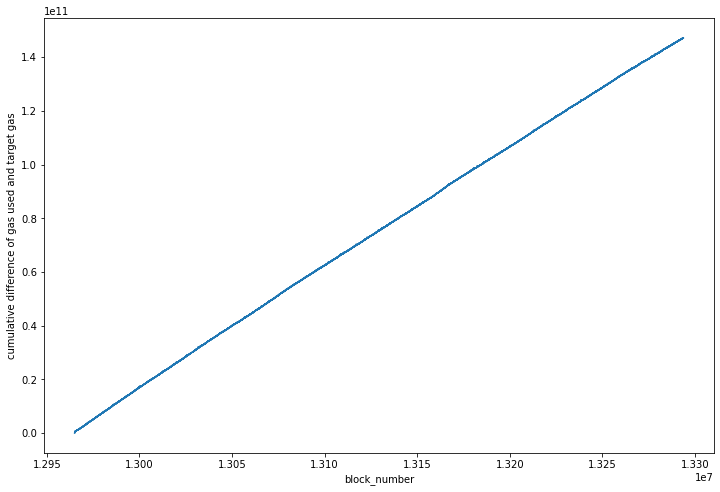

In [50]:
plt.figure(figsize=(12,8))

delta = new_df.gas_used-new_df.target_gas
delta.plot()
plt.ylabel('cumulative difference of gas used and target gas');

# Simulation of "empty-due-to-demand" empty blocks and upper bound

In [51]:
import math
from collections import deque
import random

In [52]:
sq_current_oracle = 0
eip_current_oracle = 0 

sq_blocks = []
eip_blocks = []

sq_block_mins =  deque([])
eip_block_mins = deque([])

sq_gas_price_batches = []
eip_gas_price_batches = []

sq_wait_times =[]
eip_wait_times=[]

In [53]:
def create_mempool(txn_number, sq_df, eip_df, basefee, t=0):
  
    global sq_current_oracle, eip_current_oracle, sq_gas_price_batches, eip_gas_price_batches

    values = np.random.gamma(20.72054, 1/17.49951, txn_number)
    gas_limit = (np.random.pareto(1.42150, txn_number)+1)*21000  # pareto distribution with alpha 1.42150, beta 21000
    
    sq_gas_prices = [sq_current_oracle * v for v in values] 
    eip_gas_prices = [min(basefee + (eip_current_oracle * v), sq_current_oracle * v) for v in values]   
    
    eip_gas_price_batches += [eip_gas_prices]
    sq_gas_price_batches += [sq_gas_prices]
    
    # store each updated mempool as a DataFrame

    sq_df = sq_df.append(pd.DataFrame({
        'gas price': sq_gas_prices,
        'gas limit': gas_limit,
        'time' : t,
        'amount paid': [x * y for x,y in zip(sq_gas_prices,gas_limit)]
        }), ignore_index=True)
    

    eip_df = eip_df.append(pd.DataFrame({
        'gas price': eip_gas_prices,
        'gas limit': gas_limit,
        'time': t,
        'amount paid' : [x * y for x,y in zip(eip_gas_prices,gas_limit)]
        }), ignore_index=True)
    
    # sort transactions in each mempool by gas price
    
    sq_df = sq_df.sort_values(by=['gas price'], ascending=False).reset_index(drop=True)
    eip_df = eip_df.sort_values(by=['gas price'], ascending=False).reset_index(drop=True)
    
    return sq_df, eip_df

In [54]:
def get_basefee(b, g): 
    
    return b*(1+(1/8)*((g-15000000)/15000000))

def get_oracle():
    
    global sq_current_oracle, sq_block_mins, sq_blocks, eip_block_mins, eip_current_oracle, eip_blocks
    
    update_oracle(sq_current_oracle, sq_block_mins, sq_blocks)
    update_oracle(eip_current_oracle, eip_block_mins, eip_blocks)

def update_oracle(current_oracle, block_minimums, blocks):
    recent_gp = blocks[-1][-1][1]
    block_minimums.popleft()
    block_minimums.append(recent_gp)

    sorted_block_minimums = sorted(block_minimums)
  
    current_oracle = sorted_block_minimums[59]

def fill_block(mempool, basefee, time):
    global eip_wait_times, sq_wait_times
    
    block = []
    block_size = 0
    block_limit = 30000000 if basefee > 0 else 15000000
    
    for i in range(len(mempool)):
        txn = mempool.iloc[i, :].tolist()
        if block_size + txn[1] > block_limit or txn[0] < basefee:
            break
        else:
            block.append(txn)
            block_size += txn[1]
    
    block_wait_times = [time - txn[2] for txn in block]
    if basefee:
        eip_wait_times.append(block_wait_times)
    else:
        sq_wait_times.append(block_wait_times)
    
    #remove verified txns from mempool
    mempool = mempool.iloc[i+1:,:]    
    return block, mempool, block_size

In [55]:
def simulate(n):
    
    #initialize empty dataframes
    df1 = pd.DataFrame() 
    df2 = pd.DataFrame() 
    
    sq_block_data = pd.DataFrame()
    eip_block_data = pd.DataFrame()
   
    sq_mempool_data = pd.DataFrame()
    eip_mempool_data = pd.DataFrame()
    
  
    sq_mempools = []
    eip_mempools = []
    eip_mempools_bf = []
    demands = []
    
    global sq_block_mins, eip_block_mins, sq_blocks, sq_current_oracle, eip_current_oracle, eip_blocks, eip_wait_times, sq_wait_times
    
    #read in data to initialize oracle
    data = pd.read_csv('block_data.csv')
    minGasdf = data[['gasLimit','minGasPrice']].values 
    for d in minGasdf:
        if len(eip_block_mins) == 100:
            break
        if d[1] == 'None':
            continue
        sq_block_mins.append(int(d[1]) / 10**9)
        eip_block_mins.append(int(d[1]) / 10**9)
    
    basefee = eip_block_mins[-1]
    basefees = [basefee]
    
    sorted_sq_block_mins = sorted(sq_block_mins)
    sorted_eip_block_mins = sorted([x - basefee if x >= basefee else 0 for x in eip_block_mins])
    
    #set initial oracles
    sq_current_oracle = sorted_sq_block_mins[59]
    eip_current_oracle = sorted_eip_block_mins[59]
    
    #initialize mempools with 4096 txns
    sq_mempool, eip_mempool = create_mempool(4096, df1, df2, basefee)
    
    #iterate over n blocks
    for i in range(n):
        
        #fill blocks from mempools
        new_sq_block, new_sq_mempool, sq_blocksize = fill_block(sq_mempool, 0, i)
        new_eip_block, new_eip_mempool, eip_blocksize = fill_block(sq_mempool, basefee, i)
        
        sq_blocks += [new_sq_block]
        eip_blocks += [new_eip_block]
        
        get_oracle()
        
        #update mempools
        sq_mempool = new_sq_mempool
        eip_mempool = new_eip_mempool
        
        basefee = get_basefee(basefee, eip_blocksize)
        basefees += [basefee]
        
        sq_mempools += [sq_mempool]
        eip_mempools += [eip_mempool]
        eip_mempools_bf += [eip_mempool[eip_mempool['gas price'] >= basefee]]
        
        #add 200 new txns before next iteration
        new_demand = random.randint(50, 400)
        sq_mempool, eip_mempool = create_mempool(new_demand, sq_mempool, eip_mempool, basefee, i+1)
        
        demands += [new_demand]
        
        print("progress: ", i+1, end = '\r')
    return basefees, eip_blocks, sq_blocks, eip_mempools, sq_mempools, eip_mempools_bf, demands, eip_wait_times, sq_wait_times

In [56]:
s = simulate(5001)

In [57]:
eip_mempools_bf = s[5]

# Mempool

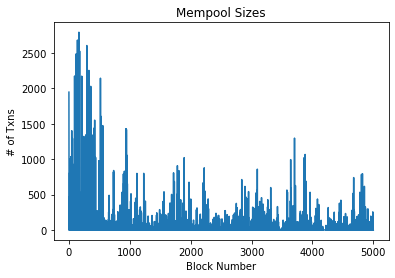

In [59]:
eip_mempool_txs = [len(x) for x in eip_mempools_bf]

plt.title("Mempool Sizes")
plt.xlabel("Block Number")
plt.ylabel("# of Txns")
plt.plot(eip_mempool_txs)

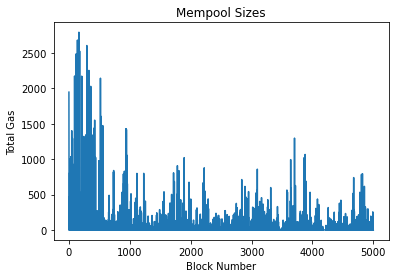

In [79]:
eip_mempool_gas_limit = [sum(x["gas limit"]) for x in eip_mempools_bf]

plt.title("Mempool Sizes")
plt.xlabel("Block Number")
plt.ylabel("Total Gas")
plt.plot(eip_mempool_txs)

Text(0.5, 1.0, 'Transaction')

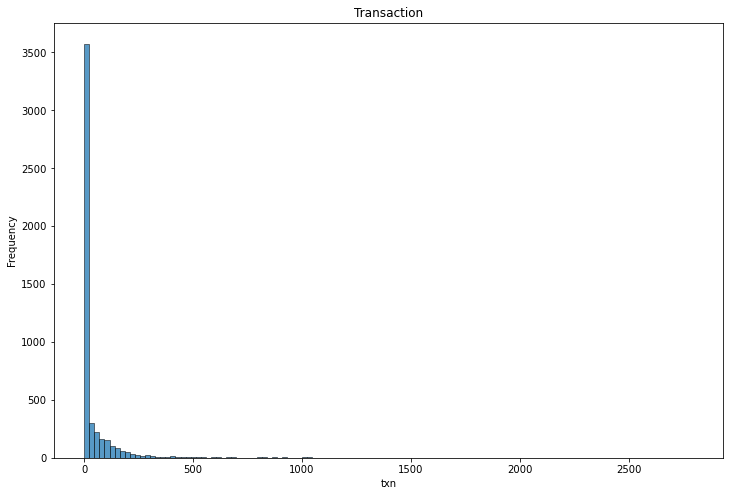

In [81]:
eip_mempool_txs = [len(x) for x in eip_mempools_bf]

plt.figure(figsize=(12,8))
sns.histplot(eip_mempool_txs, bins=120)

plt.xlabel('txn')
plt.ylabel('Frequency')
plt.title('Transaction')

In [74]:
df_block_sim = pd.DataFrame(eip_mempool_txs)

In [75]:
df_block_sim = df_block_sim.rename(columns={0: "transaction_count"})

In [77]:
df_sim_empty_block = df_block_sim[df_block_sim['transaction_count'].between(0, 0)]

Load in the real post EIP-1559 data (5000 of them).

In [82]:
df_real_post = pd.read_csv("bxs_12965_12967.csv")

In [84]:
df_real_post.set_index("block_number", inplace=True)

In [86]:
df_real_post_empty_block = df_real_post[df_real_post['gas_used'].between(0, 0)]

In [88]:
len(df_real_post_empty_block)

59

Let's plot the real and the simulate empty blocks together.

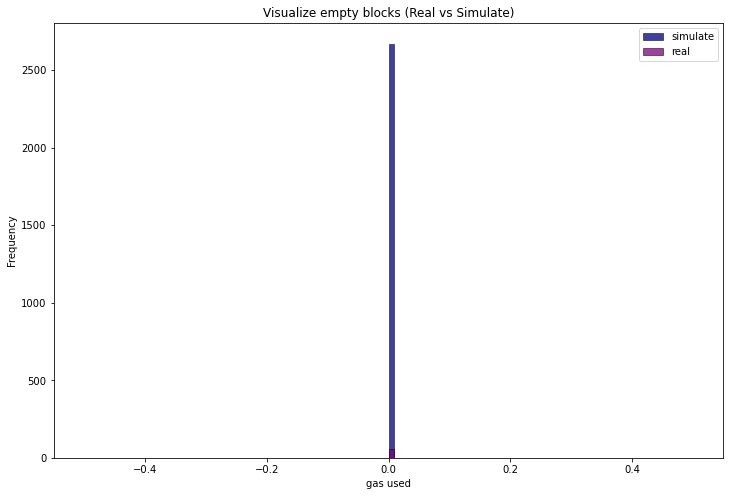

In [95]:
plt.figure(figsize=(12,8))
sns.histplot(df_sim_empty_block.transaction_count, bins=120, color='navy', label="simulate")
sns.histplot(df_real_post_empty_block.gas_used, bins=120, color='purple', label="real")

plt.xlabel('gas used')
plt.ylabel('Frequency')
plt.title('Visualize empty blocks (Real vs Simulate)')

plt.legend()
plt.show();

#### Upper Bound

In [96]:
upper_bound_empty_block = abs(len(df_sim_empty_block.transaction_count) - len(df_real_post_empty_block.gas_used))

In [97]:
upper_bound_empty_block

2611